In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
print("Rows that are not null:")
print(city_data_df.count())

Rows that are not null:
city            120
driver_count    120
type            120
dtype: int64


In [7]:
print("Number of null values:")
print(city_data_df.isnull().sum())
print("\nData types:")
print(city_data_df.dtypes)

Number of null values:
city            0
driver_count    0
type            0
dtype: int64

Data types:
city            object
driver_count     int64
type            object
dtype: object


In [8]:
print("Number of null values:")
print(ride_data_df.isnull().sum())
print("\nData types:")
print(ride_data_df.dtypes)

Number of null values:
city       0
date       0
fare       0
ride_id    0
dtype: int64

Data types:
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [9]:
print("Data Point Count by City Type:")
print(city_data_df['type'].value_counts())

Data Point Count by City Type:
Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64


#### Merging Dataframes

In [10]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Creating a Bubble Chart

### Chart Data

###### Creating new dataframes separated by city type

In [11]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == "Suburban"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


##### The total number of rides for each city by each type of city (x-axis)

In [12]:
#returns a series of the number of rides per city
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

##### The average fare for each city (y-axis)

In [13]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

###### average number of drivers for each city


In [14]:
#Will be used to correlate circle size
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

### Urban City Bubble Chart

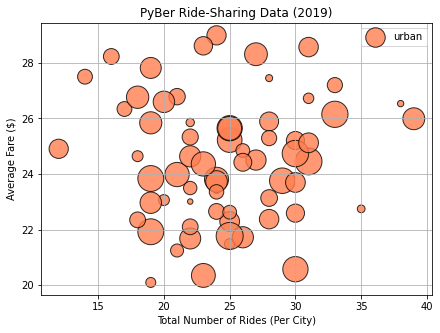

In [15]:
#Scatter plot for urban cities
plt.figure(figsize=(7,5))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10,
            c='coral',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='urban')

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

### Suburban City Bubble Chart

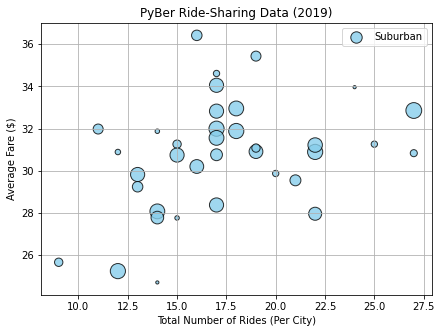

In [16]:
# scatter plot for suburban cities.
plt.figure(figsize=(7,5))
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

### Rural City Bubble Chart

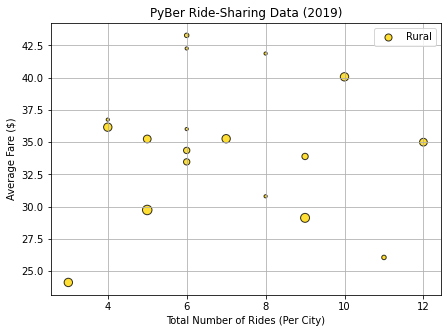

In [17]:
#Scatter plot for rural cities.
plt.figure(figsize=(7,5))
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

### Comibining the Bubble Charts

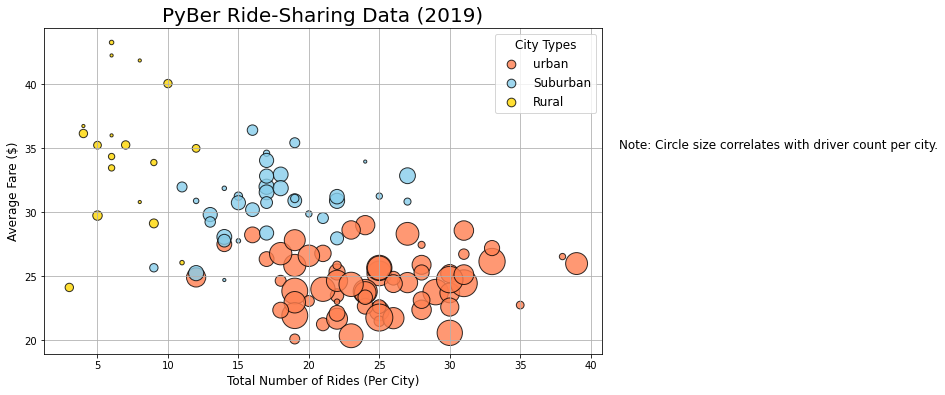

In [18]:
#Scatter plot for urban cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10,
            c='coral',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='urban')

# scatter plot for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

#Scatter plot for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#legend
lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#text label (circle size)
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize=12)

#save figure
plt.savefig("analysis/Fig1.png")

plt.show()

## Summary Statistics

In [19]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [20]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [21]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [22]:
print(" Urban")
print(urban_ride_count.describe())
print("\n Suburban")
print(suburban_ride_count.describe())
print("\n Rural")
print(rural_ride_count.describe())

 Urban
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

 Suburban
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

 Rural
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [23]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


#### Fare by City Type

In [24]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [25]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [26]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

The mean fare price for urban trips is $24.53.
The mean fare price for suburban trips is $30.97.
The mean fare price for rural trips is $34.62.


#### Number of Drivers by City Type

In [27]:
# Get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [28]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")

The mean number of drivers for urban cities is 36.68.
The median number of drivers for urban cities is 37.00.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [29]:
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.2f}.")
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.2f}.")
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.2f}.")

The mean number of drivers for urban cities is 36.68.
The mean number of drivers for suburban cities is 13.71.
The mean number of drivers for rural cities is 4.30.


### Finding Outliers

#### Box-and-Whisker Plots for Ride Count Data

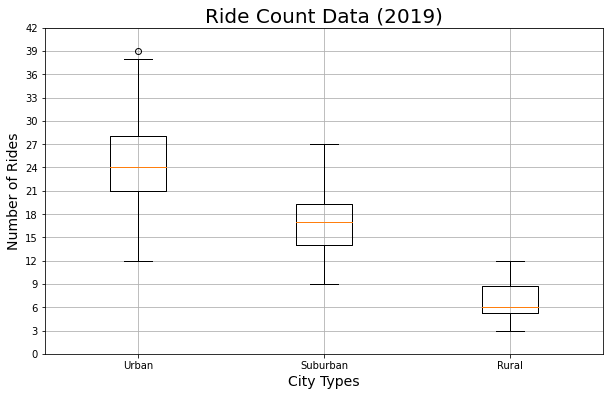

In [30]:
# All ride count box-and-whisker plots (on same graph)
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()

In [31]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


#### Box-and-Whisker Plots for Ride Fare Data

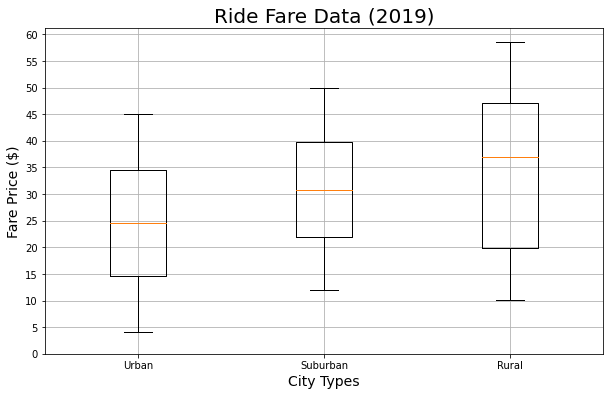

Summary Statistics

Urban Fare Data
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

Suburban Fare Data
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

Rural Fare Data
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [32]:
x_labels = ['Urban', "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Fare Data (2019)",fontsize=20)
ax.set_ylabel('Fare Price ($)',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(fare_data, labels=x_labels)
ax.set_yticks(np.arange(0,65, step=5))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show()

print("Summary Statistics")
print("\nUrban Fare Data")
print(urban_fares.describe())
print("\nSuburban Fare Data")
print(suburban_fares.describe())
print("\nRural Fare Data")
print(rural_fares.describe())

#### Box-and-Whisker Plots for Driver Count Data

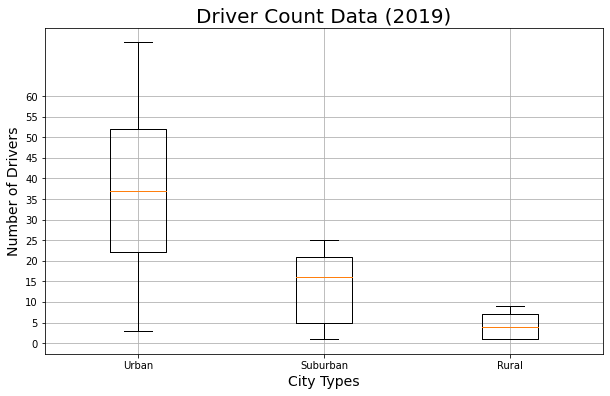

Summary Statistics

Urban Drivers Data
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

Suburban Drivers Data
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

Rural Drivers Data
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


In [33]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ['Urban', "Suburban", "Rural"]
drivers_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Driver Count Data (2019)",fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(drivers_data, labels=x_labels)
ax.set_yticks(np.arange(0,65, step=5))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show()

print("Summary Statistics")
print("\nUrban Drivers Data")
print(urban_drivers.describe())
print("\nSuburban Drivers Data")
print(suburban_drivers.describe())
print("\nRural Drivers Data")
print(rural_drivers.describe())

### Percentage of Fares for Each City Type

In [34]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [35]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [38]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * (sum_fares_by_type / total_fares)
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

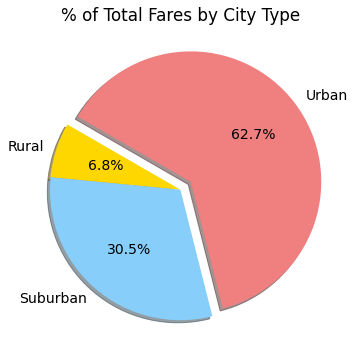

In [44]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()